In [16]:
# import cv2
# import os

# # Function to extract frames from a video
# def extract_frames(video_path, output_folder, interval=1):
#     # Open the video file
#     cap = cv2.VideoCapture(video_path)
#     if not cap.isOpened():
#         print(f"Error: Could not open video file {video_path}")
#         return
    
#     frame_count = 0
#     while True:
#         ret, frame = cap.read()
#         if not ret:
#             break
        
#         # Save frame at the specified interval
#         if frame_count % interval == 0:
#             frame_filename = f"frame_{frame_count}.jpg"
#             frame_path = os.path.join(output_folder, frame_filename)
#             cv2.imwrite(frame_path, frame)
        
#         frame_count += 1
    
#     cap.release()
#     return frame_count

# # Function to extract frames from all videos in a folder
# def extract_frames_from_folder(folder_path, output_root_folder, interval=1):
#     # List all videos in the folder
#     video_files = [f for f in os.listdir(folder_path) if f.endswith(('.mp4', '.avi', '.mov'))]
    
#     # Create output folder if it doesn't exist
#     os.makedirs(output_root_folder, exist_ok=True)
    
#     total_frames = 0
#     for video_file in video_files:
#         video_path = os.path.join(folder_path, video_file)
        
#         # Determine category (Violence or NonViolence)
#         category = "Violence" if "Violence" in folder_path else "NonViolence"
#         output_category_folder = os.path.join(output_root_folder, category)
#         os.makedirs(output_category_folder, exist_ok=True)
        
#         # Extract frames from the video
#         frames_extracted = extract_frames(video_path, output_category_folder, interval)
#         total_frames += frames_extracted
#         print(f"Extracted {frames_extracted} frames from {video_file}")
    
#     print(f"Total frames extracted: {total_frames}")

# # Example usage:
# dataset_root = '/kaggle/input/real-life-violence-situations-dataset/Real Life Violence Dataset'  # Replace with the root folder of your dataset

# # Process 'Violence' videos
# violence_folder = os.path.join(dataset_root, 'Violence')
# output_folder_violence = '/kaggle/working/'  # Adjust output folder as needed
# extract_frames_from_folder(violence_folder, output_folder_violence, interval=10)

# # Process 'NonViolence' videos
# non_violence_folder = os.path.join(dataset_root, 'NonViolence')
# output_folder_non_violence = '/kaggle/working/'  # Adjust output folder as needed
# extract_frames_from_folder(non_violence_folder, output_folder_non_violence, interval=10)


In [17]:
# import cv2
# import os

# # Function to extract frames from a video and label them
# def extract_frames_and_label(video_path, output_folder, category, interval=1):
#     # Open the video file
#     cap = cv2.VideoCapture(video_path)
#     if not cap.isOpened():
#         print(f"Error: Could not open video file {video_path}")
#         return
    
#     frame_count = 0
#     while True:
#         ret, frame = cap.read()
#         if not ret:
#             break
        
#         # Save frame at the specified interval
#         if frame_count % interval == 0:
#             frame_filename = f"{category}_frame_{frame_count}.jpg"  # Add category prefix
#             frame_path = os.path.join(output_folder, frame_filename)
#             cv2.imwrite(frame_path, frame)
        
#         frame_count += 1
    
#     cap.release()
#     return frame_count

# # Function to extract frames from all videos in a folder and label them
# def extract_frames_from_folder_and_label(folder_path, output_root_folder, category, interval=1):
#     # List all videos in the folder
#     video_files = [f for f in os.listdir(folder_path) if f.endswith(('.mp4', '.avi', '.mov'))]
    
#     # Create output root folder if it doesn't exist
#     os.makedirs(output_root_folder, exist_ok=True)
    
#     total_frames = 0
#     for video_file in video_files:
#         video_path = os.path.join(folder_path, video_file)
        
#         # Determine category (Violence or NonViolence)
#         output_category_folder = os.path.join(output_root_folder, category)
#         os.makedirs(output_category_folder, exist_ok=True)
        
#         # Extract frames from the video and label them
#         frames_extracted = extract_frames_and_label(video_path, output_category_folder, category, interval)
#         total_frames += frames_extracted
#         print(f"Extracted {frames_extracted} frames from {video_file} and labeled as {category}")
    
#     print(f"Total frames extracted and labeled: {total_frames}")

# # Example usage:
# dataset_root = '/kaggle/input/real-life-violence-situations-dataset/Real Life Violence Dataset'  # Replace with the root folder of your dataset

# # Process 'Violence' videos and label frames
# violence_folder = os.path.join(dataset_root, 'Violence')
# output_folder_violence = '/kaggle/working/Violence'  # Adjust output folder as needed
# extract_frames_from_folder_and_label(violence_folder, output_folder_violence, 'violence', interval=10)

# # Process 'NonViolence' videos and label frames
# non_violence_folder = os.path.join(dataset_root, 'NonViolence')
# output_folder_non_violence = '/kaggle/working/NonViolence'  # Adjust output folder as needed
# extract_frames_from_folder_and_label(non_violence_folder, output_folder_non_violence, 'nonviolence', interval=10)


In [18]:
# # Step 3: Data Augmentation
# datagen = ImageDataGenerator(
#     rotation_range=20,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True,
#     fill_mode='nearest'
# )

# batch_size = 32
# img_height, img_width = 224, 224  # Adjust based on your model input size

# # Flow from directory for augmentation (assuming folder structure)
# train_generator_violence = datagen.flow_from_directory(
#     output_folder_violence,
#     target_size=(img_height, img_width),
#     batch_size=batch_size,
#     class_mode='binary'  # Adjust class_mode based on your dataset
# )

# train_generator_nonviolence = datagen.flow_from_directory(
#     output_folder_non_violence,
#     target_size=(img_height, img_width),
#     batch_size=batch_size,
#     class_mode='binary'  # Adjust class_mode based on your dataset
# )

# # Example of retrieving augmented images
# steps_per_epoch_violence = len(train_generator_violence)
# steps_per_epoch_nonviolence = len(train_generator_nonviolence)

In [19]:
# Print out the directories found by flow_from_directory
print(train_generator_violence.class_indices)

# Verify the number of classes found
num_classes = len(train_generator_violence.class_indices)
print(f"Number of classes detected: {num_classes}")


NameError: name 'train_generator_violence' is not defined

# New Try

In [29]:
import os
import shutil
import cv2
import math
import random
import numpy as np
import tensorflow as tf
from tensorflow import keras
from collections import deque
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split

from keras.layers import *
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model
from keras.applications.mobilenet_v2 import MobileNetV2

from IPython.display import HTML
from base64 import b64encode

In [30]:
NonViolnceVideos_Dir = "../input/real-life-violence-situations-dataset/Real Life Violence Dataset/NonViolence/"
ViolnceVideos_Dir = "../input/real-life-violence-situations-dataset/Real Life Violence Dataset/Violence/"

In [31]:
# By this we are creating a list which contains all the videos names which we will use later
# to access all videos in the folders

NonViolence_files_names_list = os.listdir(NonViolnceVideos_Dir)
Violence_files_names_list = os.listdir(ViolnceVideos_Dir)

In [32]:
# random selections could be useful for tasks such as previewing random samples
Random_NonViolence_Video = random.choice(NonViolence_files_names_list)
Random_Violence_Video = random.choice(Violence_files_names_list)

In [33]:
IMAGE_HEIGHT, IMAGE_WIDTH = 64, 64
SEQUENCE_LENGTH = 16

In [34]:
DATASET_DIR = "../input/real-life-violence-situations-dataset/Real Life Violence Dataset/"

In [35]:
CLASSES_LIST = ["NonViolence", "Violence"]

In [36]:
def frames_extraction(video_path): # Extract frames from videos
    frames_list = [] # to store the extracted and processed frames
    video_reader = cv2.VideoCapture(video_path)
    video_frames_count = int(video_reader.get(cv2.CAP_PROP_FRAME_COUNT))
    # uniform sampling across different length videos
    skip_frames_window = max(int(video_frames_count/SEQUENCE_LENGTH), 1)

    # Frame extraction loop
    for frame_counter in range(SEQUENCE_LENGTH):
        # ensures frames are evenly spaced throughout the video
        video_reader.set(cv2.CAP_PROP_POS_FRAMES, frame_counter * skip_frames_window)
        success, frame = video_reader.read()

        if not success:
            break

        resized_frame = cv2.resize(frame, (IMAGE_HEIGHT, IMAGE_WIDTH))
        normalized_frame = resized_frame / 255 # Normalizes the pixel values
        frames_list.append(normalized_frame)

    video_reader.release()
    return frames_list

In [37]:
def create_dataset():
    features = [] # Stores the extracted and processed frames.
    labels = [] # Stores the corresponding class labels (indices).
    video_files_paths = [] # Stores the paths of the video files from which frames were extracted.

    for class_index, class_name in enumerate(CLASSES_LIST):
        print(f'Extracting Data of Class: {class_name}')
        # Now we lists all files in the directory corresponding to class_name within DATASET_DIR
        files_list = os.listdir(os.path.join(DATASET_DIR, class_name))

        # Iterates through each file in files_list.
        for file_name in files_list:
            # Make the full path to the video file
            video_file_path = os.path.join(DATASET_DIR, class_name, file_name)
            # extract frames from video_file_path
            frames = frames_extraction(video_file_path)

            if len(frames) == SEQUENCE_LENGTH:
                features.append(frames)
                labels.append(class_index)
                video_files_paths.append(video_file_path)

    # Converts features list into a numpy array for efficient processing
    features = np.asarray(features)
    labels = np.array(labels)

    return features, labels, video_files_paths

In [38]:
features, labels, video_files_paths = create_dataset()
np.save("features.npy", features)
np.save("labels.npy", labels)
np.save("video_files_paths.npy", video_files_paths)

Extracting Data of Class: NonViolence


[h264 @ 0x5b3f0213e9c0] mb_type 104 in P slice too large at 98 31
[h264 @ 0x5b3f0213e9c0] error while decoding MB 98 31
[h264 @ 0x5b3f019bccc0] mb_type 104 in P slice too large at 98 31
[h264 @ 0x5b3f019bccc0] error while decoding MB 98 31
[h264 @ 0x5b3f019bccc0] mb_type 104 in P slice too large at 98 31
[h264 @ 0x5b3f019bccc0] error while decoding MB 98 31
[h264 @ 0x5b3f019bccc0] mb_type 104 in P slice too large at 98 31
[h264 @ 0x5b3f019bccc0] error while decoding MB 98 31
[h264 @ 0x5b3f019bccc0] mb_type 104 in P slice too large at 98 31
[h264 @ 0x5b3f019bccc0] error while decoding MB 98 31


Extracting Data of Class: Violence


In [40]:
# Loading the stored features (Features were stored as numpy array)
features, labels, video_files_paths = np.load("features.npy"), np.load("labels.npy"), np.load("video_files_paths.npy")

In [41]:
# Splitting Data into Training and Testing Sets
one_hot_encoded_labels = to_categorical(labels)
features_train, features_test, labels_train, labels_test = train_test_split(features, one_hot_encoded_labels, test_size=0.1,
                                                                            shuffle=True, random_state=42)

In [43]:
# 1800 samples in training set, 16 frames, 3 channels (RGB), frame is 64x64
# 1800 training samples with 2 classes ("NonViolence" and "Violence").
print(features_train.shape, labels_train.shape)

# 200 samples in training set, 16 frames, 3 channels (RGB), frame is 64x64.
# 200 training samples with 2 classes ("NonViolence" and "Violence").
print(features_test.shape, labels_test.shape)

(1800, 16, 64, 64, 3) (1800, 2)
(200, 16, 64, 64, 3) (200, 2)


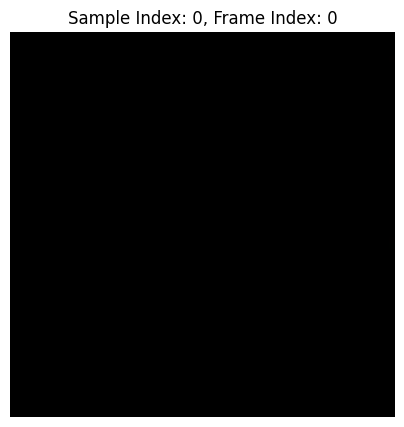

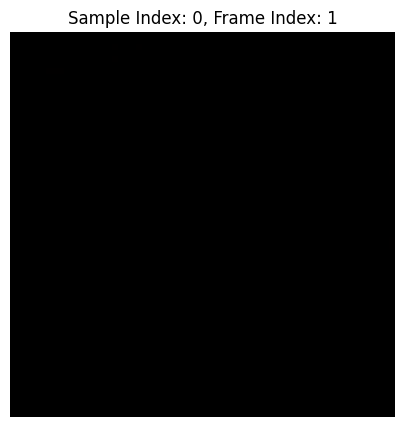

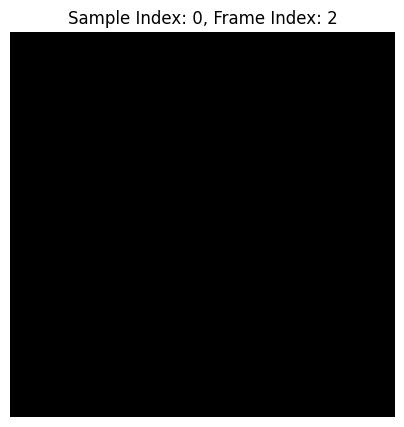

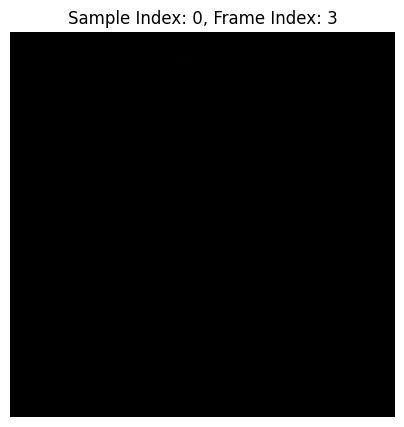

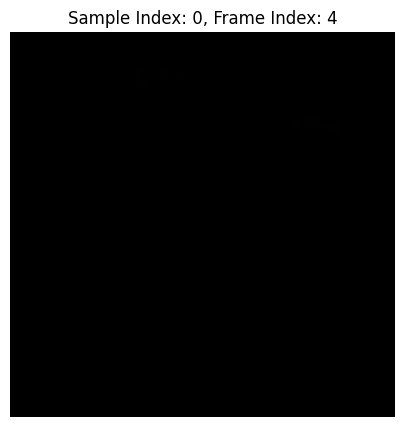

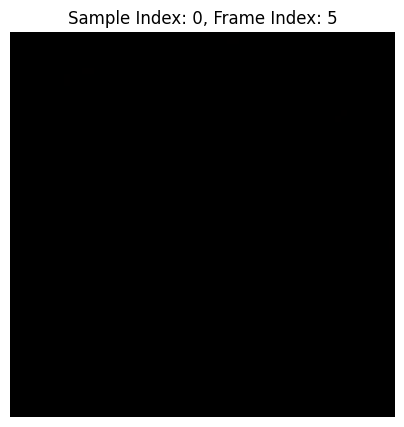

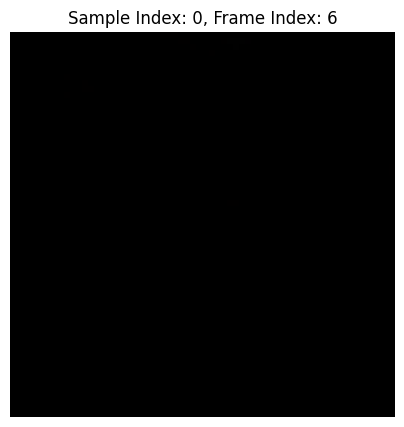

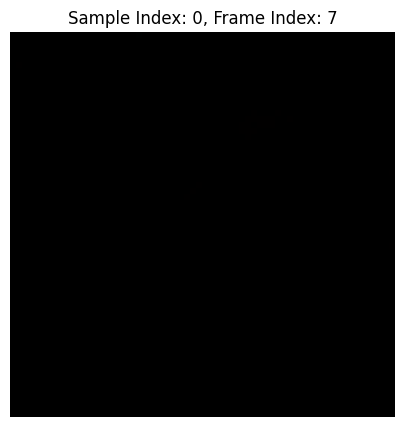

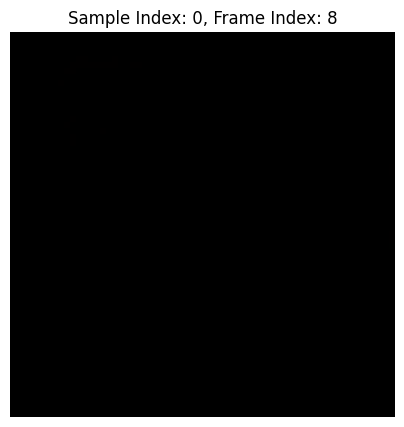

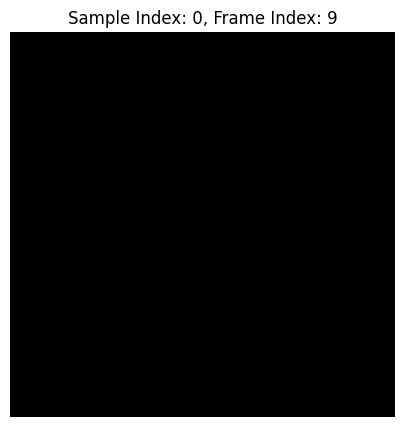

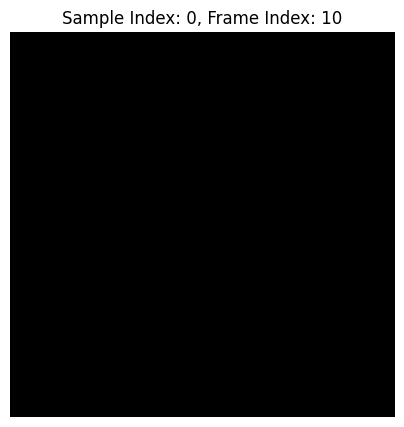

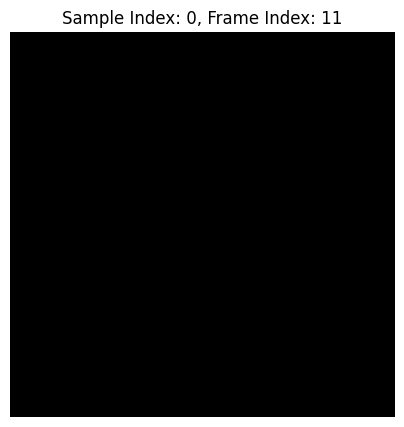

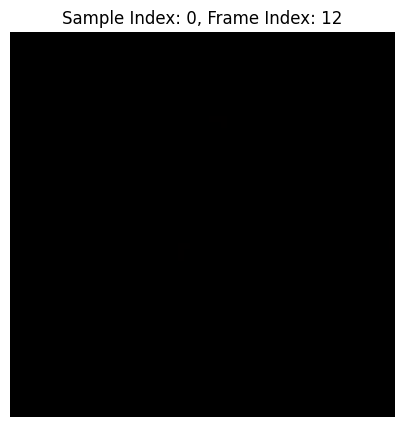

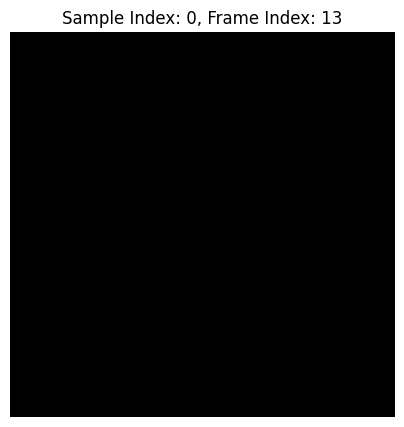

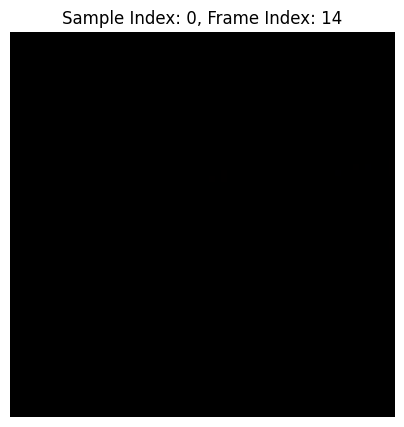

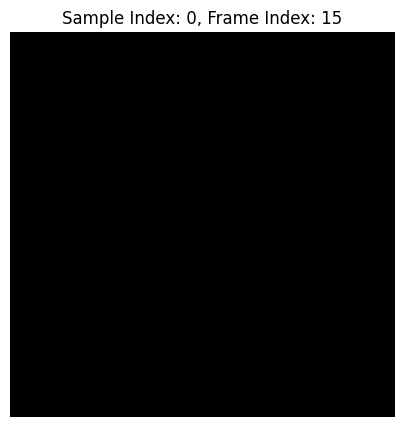

In [46]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

# Choose a sample index to visualize
sample_index = 0

# Loop through frames in the sample
for frame_index in range(SEQUENCE_LENGTH):
    frame = features_train[sample_index, frame_index]
    
    # Convert to uint8 if necessary
    frame = frame.astype(np.uint8)
    
    # Convert to RGB if necessary
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    
    # Display the frame
    plt.figure(figsize=(5, 5))
    plt.imshow(frame_rgb)
    plt.title(f"Sample Index: {sample_index}, Frame Index: {frame_index}")
    plt.axis('off')
    plt.show()


## Watching extracted frames from the dataset by giving video link

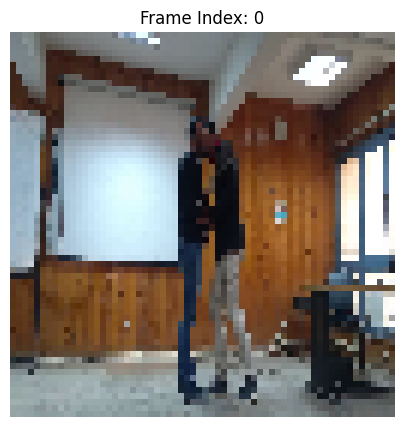

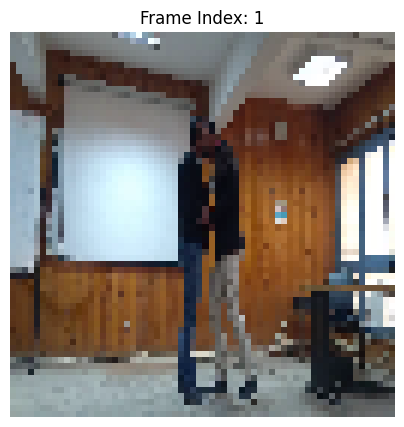

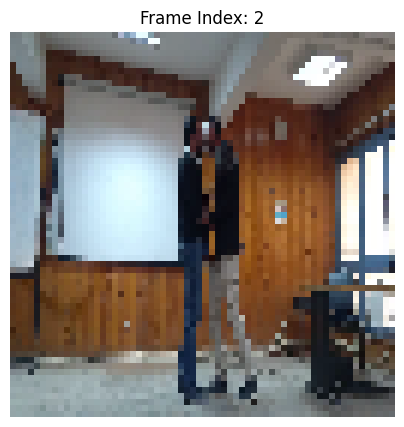

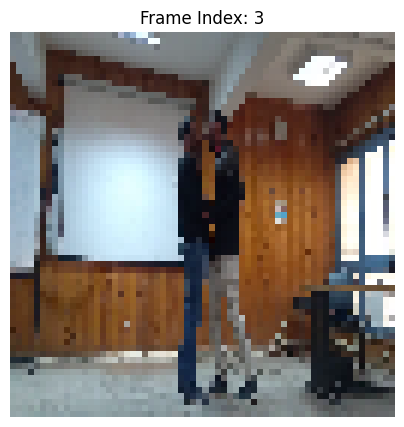

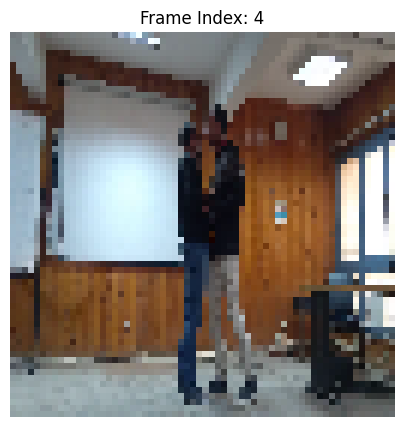

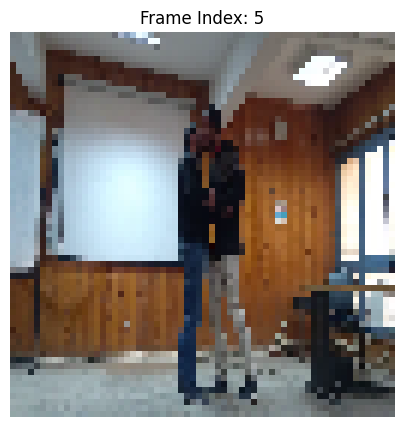

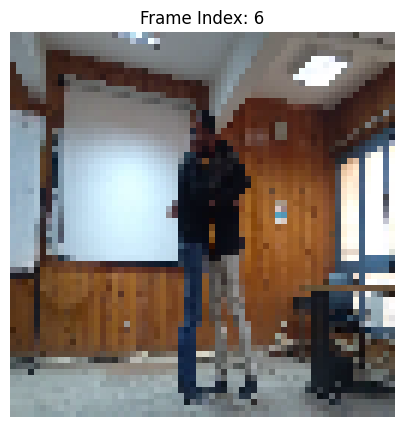

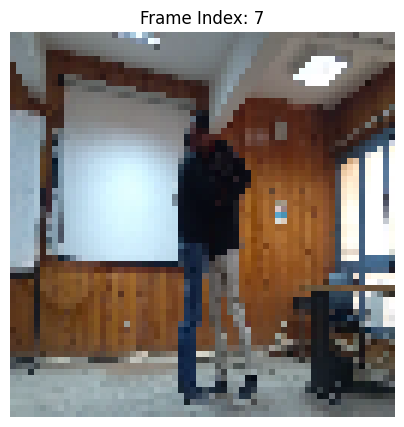

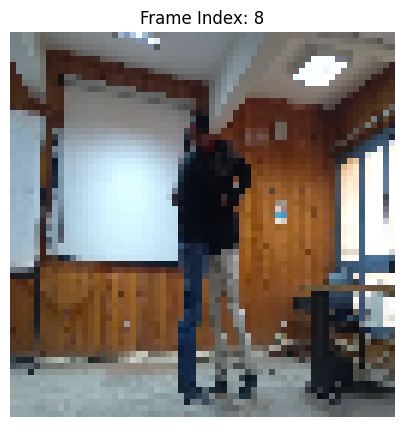

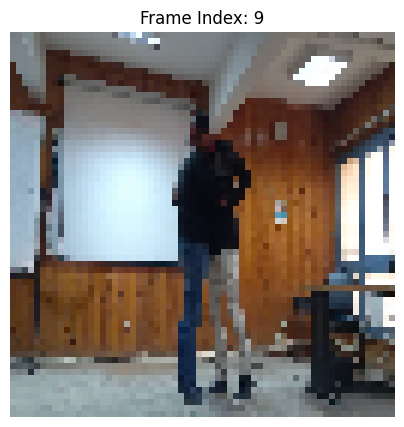

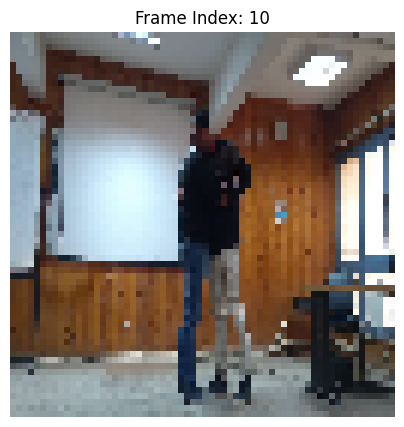

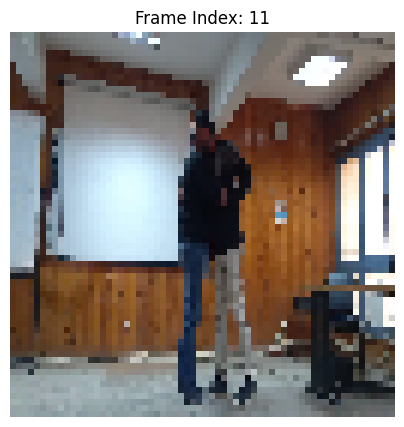

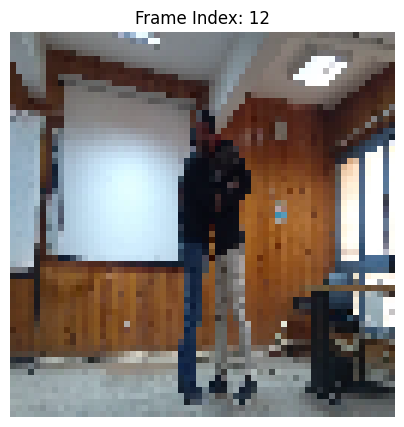

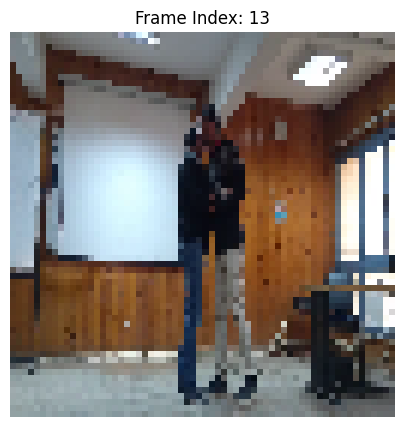

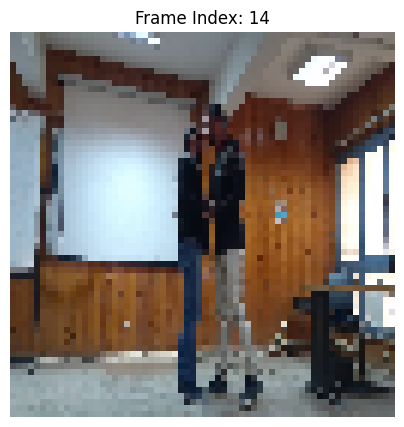

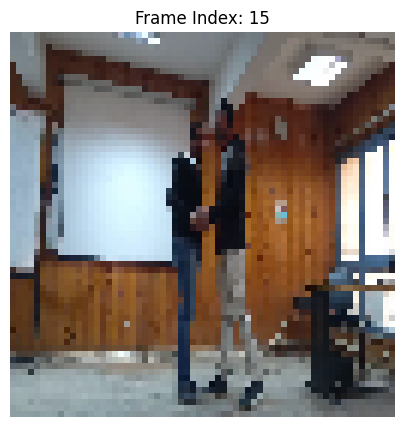

In [51]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Function to extract frames from a video
def frames_extraction(video_path):
    frames_list = []
    video_reader = cv2.VideoCapture(video_path)
    video_frames_count = int(video_reader.get(cv2.CAP_PROP_FRAME_COUNT))
    skip_frames_window = max(int(video_frames_count / SEQUENCE_LENGTH), 1)

    for frame_counter in range(SEQUENCE_LENGTH):
        video_reader.set(cv2.CAP_PROP_POS_FRAMES, frame_counter * skip_frames_window)
        success, frame = video_reader.read()

        if not success:
            break

        resized_frame = cv2.resize(frame, (IMAGE_HEIGHT, IMAGE_WIDTH))
        normalized_frame = resized_frame / 255
        frames_list.append(normalized_frame)

    video_reader.release()
    return frames_list

# Constants
VIDEO_LINK = "/kaggle/input/real-life-violence-situations-dataset/Real Life Violence Dataset/NonViolence/NV_1.mp4"  # Replace with your video link
SEQUENCE_LENGTH = 16
IMAGE_HEIGHT, IMAGE_WIDTH = 64, 64

# Extract frames from the video
frames = frames_extraction(VIDEO_LINK)

# Visualize frames
for frame_index, frame in enumerate(frames):
    frame = (frame * 255).astype(np.uint8)  # Convert to uint8 for imshow
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)  # Convert to RGB for matplotlib

    plt.figure(figsize=(5, 5))
    plt.imshow(frame_rgb)
    plt.title(f"Frame Index: {frame_index}")
    plt.axis('off')
    plt.show()


In [53]:
pip install --upgrade tensorflow keras


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 601.3/601.3 MB 771.4 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 75.1 MB/s eta 0:00:00:00:01
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.16.2
    Uninstalling tensorboard-2.16.2:
      Successfully uninstalled tensorboard-2.16.2
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.16.1
    Uninstalling tensorflow-2.16.1:
      Successfully uninstalled tensorflow-2.16.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.16.0 requires tensorflow<2.17,>=2.16, but you have tensorflow 2.17.0 which is incompatible.
tensorflow-text 2.16.1 requires tensorflow<2.17,>=2.16.1; platform_machine != "arm64" or platform_system != "Darwin", but you have tensorflow 2.17.0 which is incompatible.

[notice] A new release of p

In [2]:
import tensorflow as tf
from keras.applications import VGG16
from keras.models import Model
from keras.layers import Flatten, Dense
import numpy as np

# Define the image dimensions
IMAGE_HEIGHT, IMAGE_WIDTH = 64, 64  # Replace with your actual image dimensions

# Load the pre-trained VGG16 model without the top layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3))
base_model_output = base_model.output
base_model_output = Flatten()(base_model_output)
base_model_output = Dense(512, activation='relu')(base_model_output)

# Create a new model that outputs the features
feature_extractor = Model(inputs=base_model.input, outputs=base_model_output)
feature_extractor.trainable = False

# Dummy data: Assuming `features` is your dataset of video frames
# Here we create dummy data for demonstration purposes. Replace this with your actual dataset.
num_videos = 10  # Number of videos in your dataset
frames_per_video = 16  # Number of frames per video
features = np.random.rand(num_videos, frames_per_video, IMAGE_HEIGHT, IMAGE_WIDTH, 3)

# Extract features for each frame in a video
def extract_features(frames):
    frames = np.array(frames)
    print(f"Input shape to the model: {frames.shape}")  # Debugging: Print the shape of the input
    features = feature_extractor.predict(frames, batch_size=32)
    print(f"Output shape from the model: {features.shape}")  # Debugging: Print the shape of the output
    return features

# Extract features for all video frames
extracted_features = [extract_features(video) for video in features]

# Reshape the extracted features to fit the expected input shape for the next model
extracted_features = np.array(extracted_features)
extracted_features = extracted_features.reshape((extracted_features.shape[0], extracted_features.shape[1], -1))

print(extracted_features.shape)


Input shape to the model: (16, 64, 64, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
Output shape from the model: (16, 512)
Input shape to the model: (16, 64, 64, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Output shape from the model: (16, 512)
Input shape to the model: (16, 64, 64, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


I0000 00:00:1721161071.268077      84 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


Output shape from the model: (16, 512)
Input shape to the model: (16, 64, 64, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Output shape from the model: (16, 512)
Input shape to the model: (16, 64, 64, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Output shape from the model: (16, 512)
Input shape to the model: (16, 64, 64, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Output shape from the model: (16, 512)
Input shape to the model: (16, 64, 64, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Output shape from the model: (16, 512)
Input shape to the model: (16, 64, 64, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Output shape from the model: (16, 512)
Input shape to the model: (16, 64, 64, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Output shape from the model: (16, 512)
Input shape to the model: (16, 64, 64, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Output shape from the model: (16, 512)
(10, 16, 512)


In [5]:
from sklearn.model_selection import train_test_split  # Add this import
# Dummy labels: Replace with your actual labels
labels = np.random.randint(0, 2, size=num_videos)  # Binary labels for demonstration

# Split dataset into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(extracted_features, labels, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Define your classifier model (example: simple Dense layers)
classifier = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(frames_per_video, 512)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
classifier.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

# Train the model
classifier.fit(X_train, y_train,
               validation_data=(X_val, y_val),
               epochs=10,
               batch_size=32)

# Evaluate the model on the test set
test_loss, test_acc = classifier.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc}")

# Optionally, save the trained model
# classifier.save('your_model_name.h5')

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7143 - loss: 0.6236

W0000 00:00:1721161707.537509      85 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.7143 - loss: 0.6236 - val_accuracy: 0.0000e+00 - val_loss: 7.4889
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.2857 - loss: 5.2713 - val_accuracy: 1.0000 - val_loss: 0.5341
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 1.0000 - loss: 0.5143 - val_accuracy: 1.0000 - val_loss: 0.0187
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7143 - loss: 1.1283 - val_accuracy: 1.0000 - val_loss: 0.0100
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7143 - loss: 1.2950 - val_accuracy: 1.0000 - val_loss: 0.0090
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7143 - loss: 1.3186 - val_accuracy: 1.0000 - val_loss: 0.0115
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7143 - loss: 1.2459 - val_accuracy: 1.0000 - val_loss: 0.0187
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.7143 - loss: 1.1073 - val_accuracy: 1.0000 - val_loss: 0.0360
Epoch 9/1

In [6]:
# Unfreeze some layers of the base_model for fine-tuning
for layer in base_model.layers[-4:]:
    layer.trainable = True

# Recompile the model after unfreezing some layers
classifier.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

# Train the model again for fine-tuning
classifier.fit(X_train, y_train,
               validation_data=(X_val, y_val),
               epochs=10,
               batch_size=32)


Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7143 - loss: 0.6234

W0000 00:00:1721162008.913166      85 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.7143 - loss: 0.6234 - val_accuracy: 1.0000 - val_loss: 0.4672
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.7143 - loss: 0.5818 - val_accuracy: 1.0000 - val_loss: 0.5426
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.7143 - loss: 0.5969 - val_accuracy: 1.0000 - val_loss: 0.4131
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.7143 - loss: 0.5566 - val_accuracy: 1.0000 - val_loss: 0.2860
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.7143 - loss: 0.5436 - val_accuracy: 1.0000 - val_loss: 0.2221
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.7143 - loss: 0.5512 - val_accuracy: 1.0000 - val_loss: 0.2129
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.7143 - loss: 0.5462 - val_accuracy: 1.0000 - val_loss: 0.2424
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.7143 - loss: 0.5268 - val_accuracy: 1.0000 - val_loss: 0.3008
Epoch 9/10
1/